In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
df = df[["Make", "Model", "Year",
"Engine HP", "Engine Cylinders",
"Transmission Type", "Vehicle Style", "highway MPG",
"city mpg", "MSRP"]]

In [6]:
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [11]:
df = df.fillna(0)

In [12]:
df.isnull().sum().sum()

0

In [13]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [28]:
# Calcular el promedio de la columna "MSRP"
average_msrp = df['msrp'].mean()

# Crear una nueva columna "above_average" y asignar 1 si MSRP > promedio, 0 en caso contrario
df['above_average'] = df['msrp'].apply(lambda x: 1 if x > average_msrp else 0)

# Verificar el resultado
print(df.head())

  make       model  year  engine_hp  engine_cylinders transmission_type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

  vehicle_style  highway_mpg  city_mpg   msrp  above_average  
0         Coupe           26        19  46135              1  
1   Convertible           28        19  40650              1  
2         Coupe           28        20  36350              0  
3         Coupe           28        18  29450              0  
4   Convertible           28        18  34500              0  


In [29]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [31]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop('above_average', axis=1)  # Características sin la columna objetivo
y = df['above_average']  # Variable objetivo

# Dividir los datos en entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Question 1

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
# Crear un DataFrame de entrenamiento que contenga solo las características numéricas y la variable objetivo
df_train = pd.concat([X_train, y_train], axis=1)

# Lista de variables numéricas
numerical_vars = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

# Diccionario para almacenar los AUC de cada variable
auc_scores = {}

# Calcular el AUC para cada variable y almacenar en el diccionario
for var in numerical_vars:
    auc = roc_auc_score(df_train['above_average'], df_train[var])
    
    # Si el AUC es menor que 0.5, invertir la variable
    if auc < 0.5:
        auc = roc_auc_score(df_train['above_average'], -df_train[var])
    
    auc_scores[var] = auc

# Encontrar la variable con el AUC más alto
highest_auc_var = max(auc_scores, key=auc_scores.get)

# Mostrar los AUC de todas las variables y la variable con el AUC más alto
print("AUC Scores:")
for var, auc in auc_scores.items():
    print(f"{var}: {auc}")
    
print("\nLa variable con el AUC más alto es:", highest_auc_var)

AUC Scores:
engine_hp: 0.9159001518508375
engine_cylinders: 0.768274900593613
highway_mpg: 0.6333685399678282
city_mpg: 0.67232674562278

La variable con el AUC más alto es: engine_hp


In [34]:
# Crear un objeto DictVectorizer para la codificación one-hot
vec = DictVectorizer(sparse=False)

# Aplicar one-hot encoding a las características categóricas en los conjuntos de entrenamiento y validación
X_train_encoded = vec.fit_transform(X_train.to_dict(orient='records'))
X_val_encoded = vec.transform(X_val.to_dict(orient='records'))

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_val = model.predict_proba(X_val_encoded)[:, 1]

# Calcular el AUC en el conjunto de validación
auc_val = roc_auc_score(y_val, y_pred_val)

# Imprimir el resultado redondeado a 3 dígitos
print("El AUC en el conjunto de validación es:", round(auc_val, 3))

El AUC en el conjunto de validación es: 1.0


In [35]:
auc_val

1.0

In [36]:
auc_scores

{'engine_hp': 0.9159001518508375,
 'engine_cylinders': 0.768274900593613,
 'highway_mpg': 0.6333685399678282,
 'city_mpg': 0.67232674562278}

# Question 2

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Crear un objeto DictVectorizer para la codificación one-hot
vec = DictVectorizer(sparse=False)

# Aplicar one-hot encoding a las características categóricas en los conjuntos de entrenamiento y validación
X_train_encoded = vec.fit_transform(X_train.to_dict(orient='records'))
X_val_encoded = vec.transform(X_val.to_dict(orient='records'))

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_val = model.predict_proba(X_val_scaled)[:, 1]

# Calcular el AUC en el conjunto de validación
auc_val = roc_auc_score(y_val, y_pred_val)

# Imprimir el resultado redondeado a 3 dígitos
print("El AUC en el conjunto de validación es:", round(auc_val, 3))

El AUC en el conjunto de validación es: 0.996


In [38]:
auc_val

0.9956528016169653

# Question 3

In [40]:
from sklearn.metrics import precision_score, recall_score

El umbral en el que las curvas de precisión y exhaustividad se intersectan es: 0.45


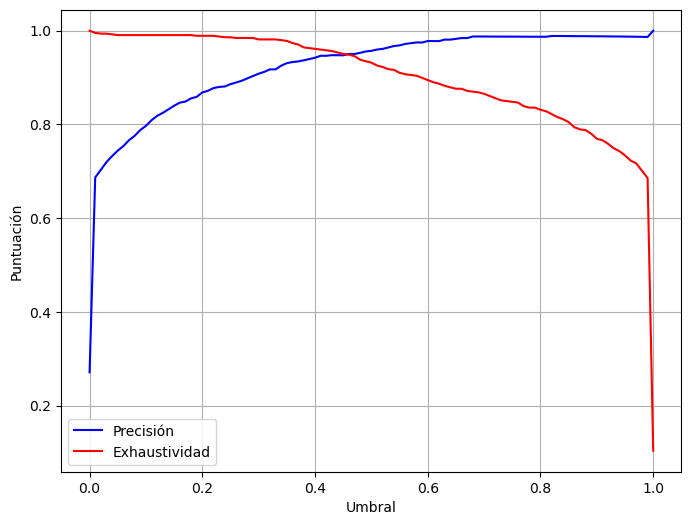

In [41]:
# Calcular la precisión y la exhaustividad para varios umbrales
thresholds = np.arange(0, 1.01, 0.01)
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_val >= threshold).astype(int)
    precision = precision_score(y_val, y_pred_threshold)
    recall = recall_score(y_val, y_pred_threshold)
    
    precision_scores.append(precision)
    recall_scores.append(recall)

# Graficar las curvas de precisión y exhaustividad
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_scores, label='Precisión', color='blue')
plt.plot(thresholds, recall_scores, label='Exhaustividad', color='red')
plt.xlabel('Umbral')
plt.ylabel('Puntuación')
plt.legend()
plt.grid(True)

# Encontrar el umbral en el que las curvas se intersectan
intersection_threshold = thresholds[np.argwhere(np.diff(np.sign(np.array(precision_scores) - np.array(recall_scores))))[0][0]]

# Imprimir el umbral redondeado a 2 dígitos
print("El umbral en el que las curvas de precisión y exhaustividad se intersectan es:", round(intersection_threshold, 2))

# Mostrar el gráfico
plt.show()

# Question 4

In [42]:
from sklearn.metrics import f1_score

# Calcular el puntaje F1 para varios umbrales
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_val >= threshold).astype(int)
    f1 = f1_score(y_val, y_pred_threshold)
    f1_scores.append(f1)

# Encontrar el umbral en el que el puntaje F1 es máximo
max_f1_threshold = thresholds[np.argmax(f1_scores)]

# Imprimir el umbral redondeado a 2 dígitos
print("El umbral en el que el puntaje F1 es máximo es:", round(max_f1_threshold, 2))

El umbral en el que el puntaje F1 es máximo es: 0.35


# Question 5

In [47]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp',
       'above_average'],
      dtype='object')

In [48]:
from sklearn.model_selection import KFold

# Crear un objeto DictVectorizer para la codificación one-hot
vec = DictVectorizer(sparse=False)

# Aplicar one-hot encoding a las características categóricas en df
X_encoded = vec.fit_transform(df.to_dict(orient='records'))

# Definir la variable objetivo y
y = df['above_average']

# Configurar la validación cruzada con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

# Iterar sobre los diferentes pliegues de KFold
for train_index, val_index in kf.split(X_encoded):
    X_train = X_encoded[train_index]
    X_val = X_encoded[val_index]
    y_train = y.iloc[train_index]
    y_val = y.iloc[val_index]
    
    # Inicializar y entrenar el modelo de regresión logística
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de validación y calcular el AUC
    y_pred_val = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred_val)
    
    scores.append(auc)

# Calcular la desviación estándar de los puntajes en los diferentes pliegues
std_deviation = np.std(scores)

# Imprimir la desviación estándar
print("La desviación estándar de los puntajes en los diferentes pliegues es:", round(std_deviation, 3))

La desviación estándar de los puntajes en los diferentes pliegues es: 0.0


In [49]:
std_deviation

1.4223827639915907e-06

# Question 6

In [50]:
# Valores de C a probar
C_values = [0.01, 0.1, 0.5, 10]

# Diccionario para almacenar las puntuaciones
scores_dict = {}

# Configurar la validación cruzada con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for C in C_values:
    scores = []
    
    # Iterar sobre los diferentes pliegues de KFold
    for train_index, val_index in kf.split(X_encoded):
        X_train = X_encoded[train_index]
        X_val = X_encoded[val_index]
        y_train = y.iloc[train_index]
        y_val = y.iloc[val_index]

        # Inicializar y entrenar el modelo de regresión logística con el valor de C
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de validación y calcular el AUC
        y_pred_val = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred_val)

        scores.append(auc)
    
    # Calcular la puntuación media y la desviación estándar
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    # Almacenar la puntuación en el diccionario
    scores_dict[C] = (mean_score, std_score)

# Encontrar el valor de C que produce la mejor puntuación media y la menor desviación estándar
best_C = min(scores_dict, key=lambda x: (scores_dict[x][0], scores_dict[x][1]))

# Obtener la mejor puntuación media y desviación estándar
best_mean_score, best_std_score = scores_dict[best_C]

# Imprimir el valor de C y las puntuaciones
print("El valor de C que produce la mejor puntuación media es:", best_C)
print("La mejor puntuación media es:", round(best_mean_score, 3))
print("La desviación estándar correspondiente es:", round(best_std_score, 3))

El valor de C que produce la mejor puntuación media es: 0.5
La mejor puntuación media es: 1.0
La desviación estándar correspondiente es: 0.0
